The basic idea here is to evaluate how well we can detect RGB stars and construct colour-magnitude diagrams (CMDs) for populations at various distances after 1,5 and 10 years of survey operations. This could be relevant for studies of the resolved stellar content in known Local Volume galaxies (e.g. searching for stellar streams in the their halos and mapping their low surface brightness extents) as well as perhaps for detecting new satellites and tidal streams in the very peripheral regions of the Galactic Halo (where main sequence turn off stars will be too faint to detect).  

Let's assume that we need to reach at least 2 magnitudes below the RGB tip (TRGB) in order to detect sufficient numbers of stars. If we take the TRGB as M$_i$=-4 then this corresponds to reaching stars at M$_i$=-2. While RGB stars have a range of g-i colours, assume here a fiducial value of g-i=1.2 (appropriate for metal-poor RGB populations). Hence, assuming no extinction, we want to evaluate how we can detect point sources with M$-i$=-2 and g-i=1.2 at various distances and at various stages of
the survey.  

LSST is likely to be able to detect resolved populations out to several Mpc so a useful range in distance to explore might be 0.1-5 Mpc. But to begin with, we could assume we are interested in a single galaxy -- NGC 300 at m-M=26.44 -- which is situated in the nearby Sculptor Group and just beyond the boundary of the Local Group.  

Constructing a CMD requires detecting stars in two filters with good significance. After [1,5,10] years, how well is this RGB star detected in the g and i bands at a distance of NGC300 (i.e. g=25.6,i=24.4)? Or, alternatively, how long do we need to wait to get a 5$\sigma$ detection of this RGB star at the distance of NGC300? 

Additional things to consider:
- simulate this for the actual population of Local Volume galaxies, using their known distances and line-of-sight extinction. 
- because this involves detecting resolved stellar populations, good seeing is important for optimising star-galaxy separation. Hence might want to limit to consider only those observations with seeing less than 0.7 arcsec. 
- I have assumed g,i as the default filter set. This a commonly used filter combination because it has good sensitivity to metallicity on the RGB, but other filter combinations could be looked at for CMD construction as they may be more efficient.  
- simulate this for a real RGB population (i.e. generate a synthetic RGB for a given star formation history and assumed metallicity distribution) as opposed to just a fiducial RGB star. 
- there will be contaminants in the form of unresolved background galaxies and foreground Milky Way stars. Detecting a significant population of RGB stars requires detecting them against this contaminant background, and hence what is considered here is idealised. 


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
filterName1 = 'g'
filterName2 = 'i'
years=[1.,5.,10.]
#nights = np.array(years)*365.25
goodSeeing = 0.7
sqls = ['filter = "%s" and night < %f and finSeeing < %f'% (filterName1, 5.*365.25, goodSeeing),
        'filter = "%s" and night < %f and finSeeing < %f'% (filterName2, 5.*365.25, goodSeeing)]
print sqls

['filter = "g" and night < 1826.250000 and finSeeing < 0.700000', 'filter = "i" and night < 1826.250000 and finSeeing < 0.700000']


In [4]:
# Set up the database connection
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
outDir = 'goodseeing_test'
resultsDb = db.ResultsDb(outDir=outDir)

In [5]:
slicer = slicers.HealpixSlicer(lonCol='ditheredRA',latCol='ditheredDec')
summaryMetrics = [metrics.MeanMetric(), metrics.MedianMetric()]

bgroupList = []
names = ['All Visits', 'Good Seeing']
for name,sql in zip(names, sqls):
    metric = metrics.Coaddm5Metric(metricName=name)
    bundle = metricBundles.MetricBundle(metric, slicer, sql, summaryMetrics=summaryMetrics)
    bgroup = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroupList.append(bgroup)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database with constraint filter = "g" and night < 1826.250000 and finSeeing < 0.700000
Found 28702 visits
Running:  [0]
Completed metric generation.

/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'filter = "g" and night < ...' should be explicitly declared as text('filter = "g" and night < ...') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
Optimal bin calculation tried to make 224 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = "g" and night < 1826.250000 and finSeeing < 0.700000 sqlconstraint now.
monopole: 26.0903  dipole: lon: 154.544, lat: -63.4342, amp: 0.219164
Plotting complete.
Querying database with constraint filter = "i" and night < 1826.250000 and finSeeing < 0.700000
Found 95539 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = "i" and night < 1826.250000 and finSeeing < 0.700000 sqlconstraint now.
monopole: 25.6542  dipole: lon: 52.9758, lat: -48.8434, amp: 0.17246
Plotting complete.


Optimal bin calculation tried to make 227 bins, returning 200


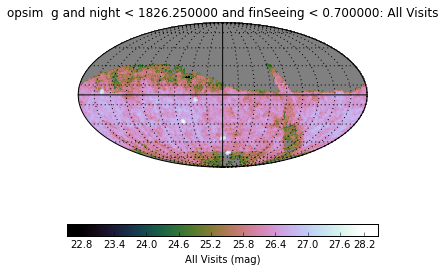

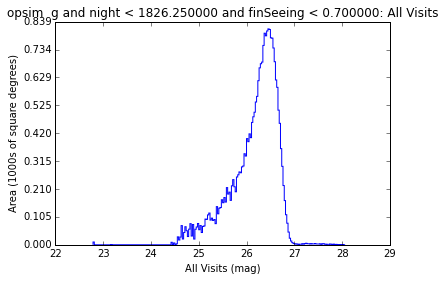

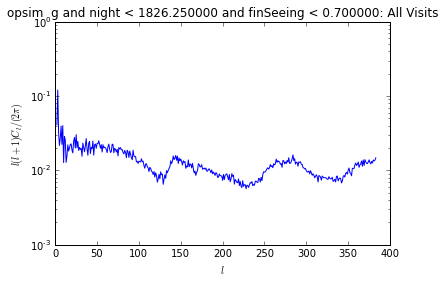

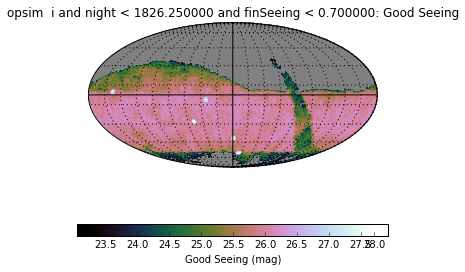

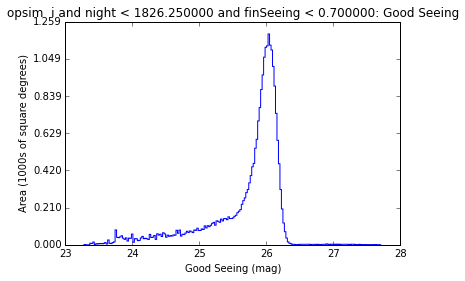

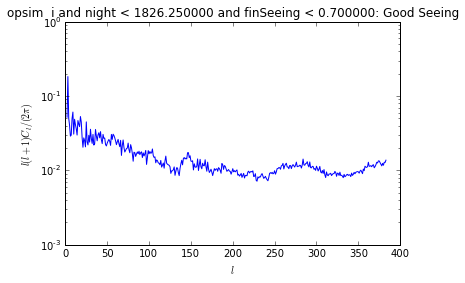

In [6]:
for bgroup in bgroupList:
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

In [7]:
print 'name, mean depth, median depth'
for bundleGroup in bgroupList:
    print bundleGroup.bundleDict[0].metric.name, bundleGroup.bundleDict[0].summaryValues['Mean'], bundleGroup.bundleDict[0].summaryValues['Median']

name, mean depth, median depth
All Visits 26.1623740452 26.2895046877
Good Seeing 25.7045066168 25.9248670884


In [8]:
b = bundleGroup.bundleDict[0]

In [9]:
b.metricValues.data[10000]

0.0